In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import data from csv
yield_curve_df = pd.read_csv('yield_data/Short-term_20221214.csv')
yield_curve_df

,Unnamed: 0,bond_ttm,risk_free_rate
0,0,0.25,0.027790
1,1,0.50,0.028659
2,2,1.00,0.030361
3,3,3.00,0.035310
4,4,5.00,0.036518
5,5,7.00,0.036524
6,6,10.00,0.037181


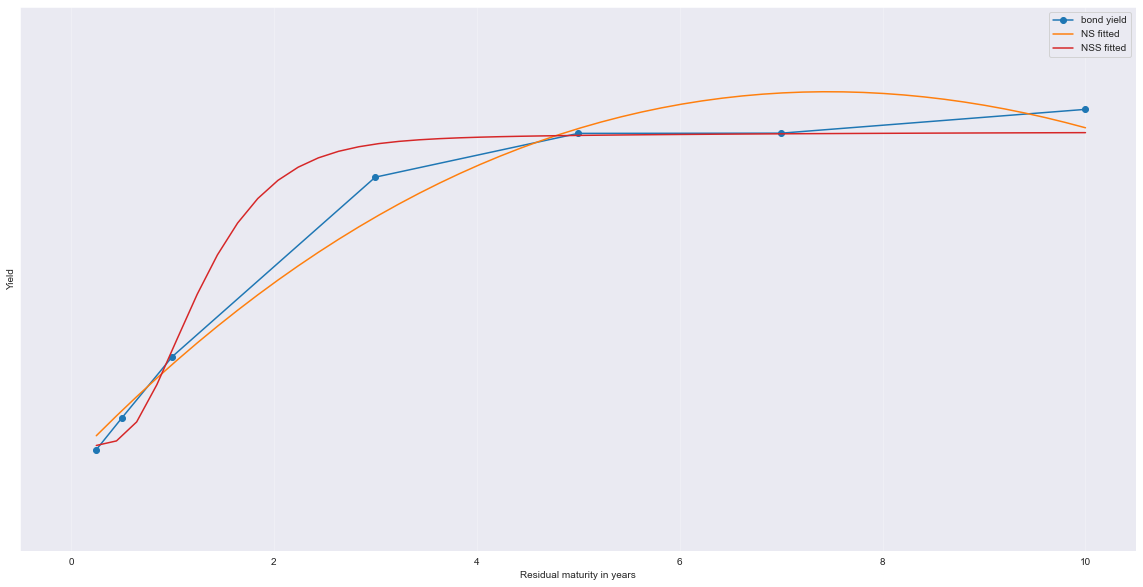

In [3]:
# compare data
import seaborn as sns
from NS_yield_curve import ns, ns_curve_fit
from NSS_yield_curve import nss, nss_curve_fit
# input bond tenor together with risk free rate
t = yield_curve_df.bond_ttm
rates = yield_curve_df.risk_free_rate
# nelson siegel model
import numpy as np
tenors = np.linspace(0.25, 10)
params = ns_curve_fit(t, rates)
fitted_data = ns(params, tenors)
# nss model
nss_params = nss_curve_fit(t, rates)
nss_fitted_data = nss(nss_params, tenors)
# plot comparison
fig, ax = plt.subplots(figsize=(20,10))
ax.plot('bond_ttm', 'risk_free_rate', data=yield_curve_df, marker='o',label='bond yield')
ax.plot(tenors, fitted_data, label = 'NS fitted')
ax.plot('bond_ttm')
ax.plot(tenors, nss_fitted_data, label = 'NSS fitted')
ax.legend()
ax.set_xlabel('Residual maturity in years')
ax.grid(alpha=0.3)
ax.set_ylabel('Yield')
# set y axis
import matplotlib.ticker as mtick
plt.ylim(0.025, 0.04)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.show()

In [15]:
# compare results using library
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
curve, status = calibrate_ns_ols(
    np.array(t),
    np.array(rates),
    tau0 = 1.0 #Initial guess 1.0 for the optimization of tau
)

fitterFit = curve(t)

In [16]:
fitterFit

0    0.027466
1    0.028805
2    0.030874
3    0.034838
4    0.036210
5    0.036838
6    0.037312
Name: bond_ttm, dtype: float64

In [17]:
nss_params = nss_curve_fit(t, rates)
nss_fitted_data = nss(nss_params, t)
ns_params = ns_curve_fit(t, rates)
ns_fitted_data = ns(ns_params, t)

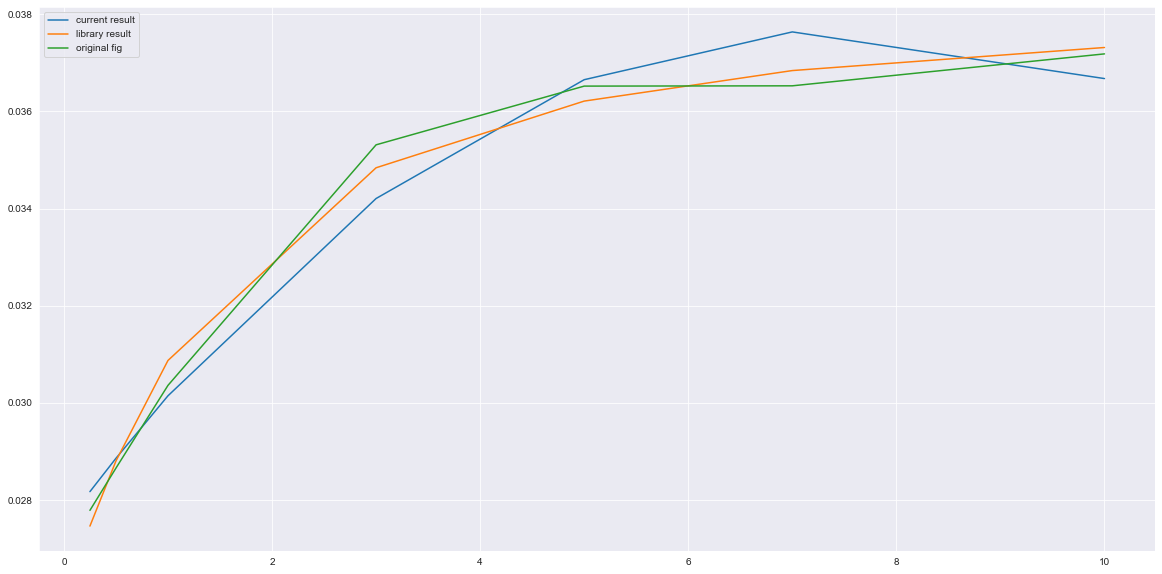

In [25]:
# compare current result with library result
# guessing difference results from model calibration
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(t, ns_fitted_data, label ='current result')
plt.plot(t, fitterFit, label = 'library result')
plt.plot(t, rates, label = 'original fig')
ax.legend()
plt.show()